# 原问题都匹配

## 小规模下性能较好

```
while reward != 0 :
    action = agent.take_action(vehicle_states, order_states)
    reward = env.test_step(orders_unmatched,action)
```

这个代码使得学习效果上升，未加此代码下有：

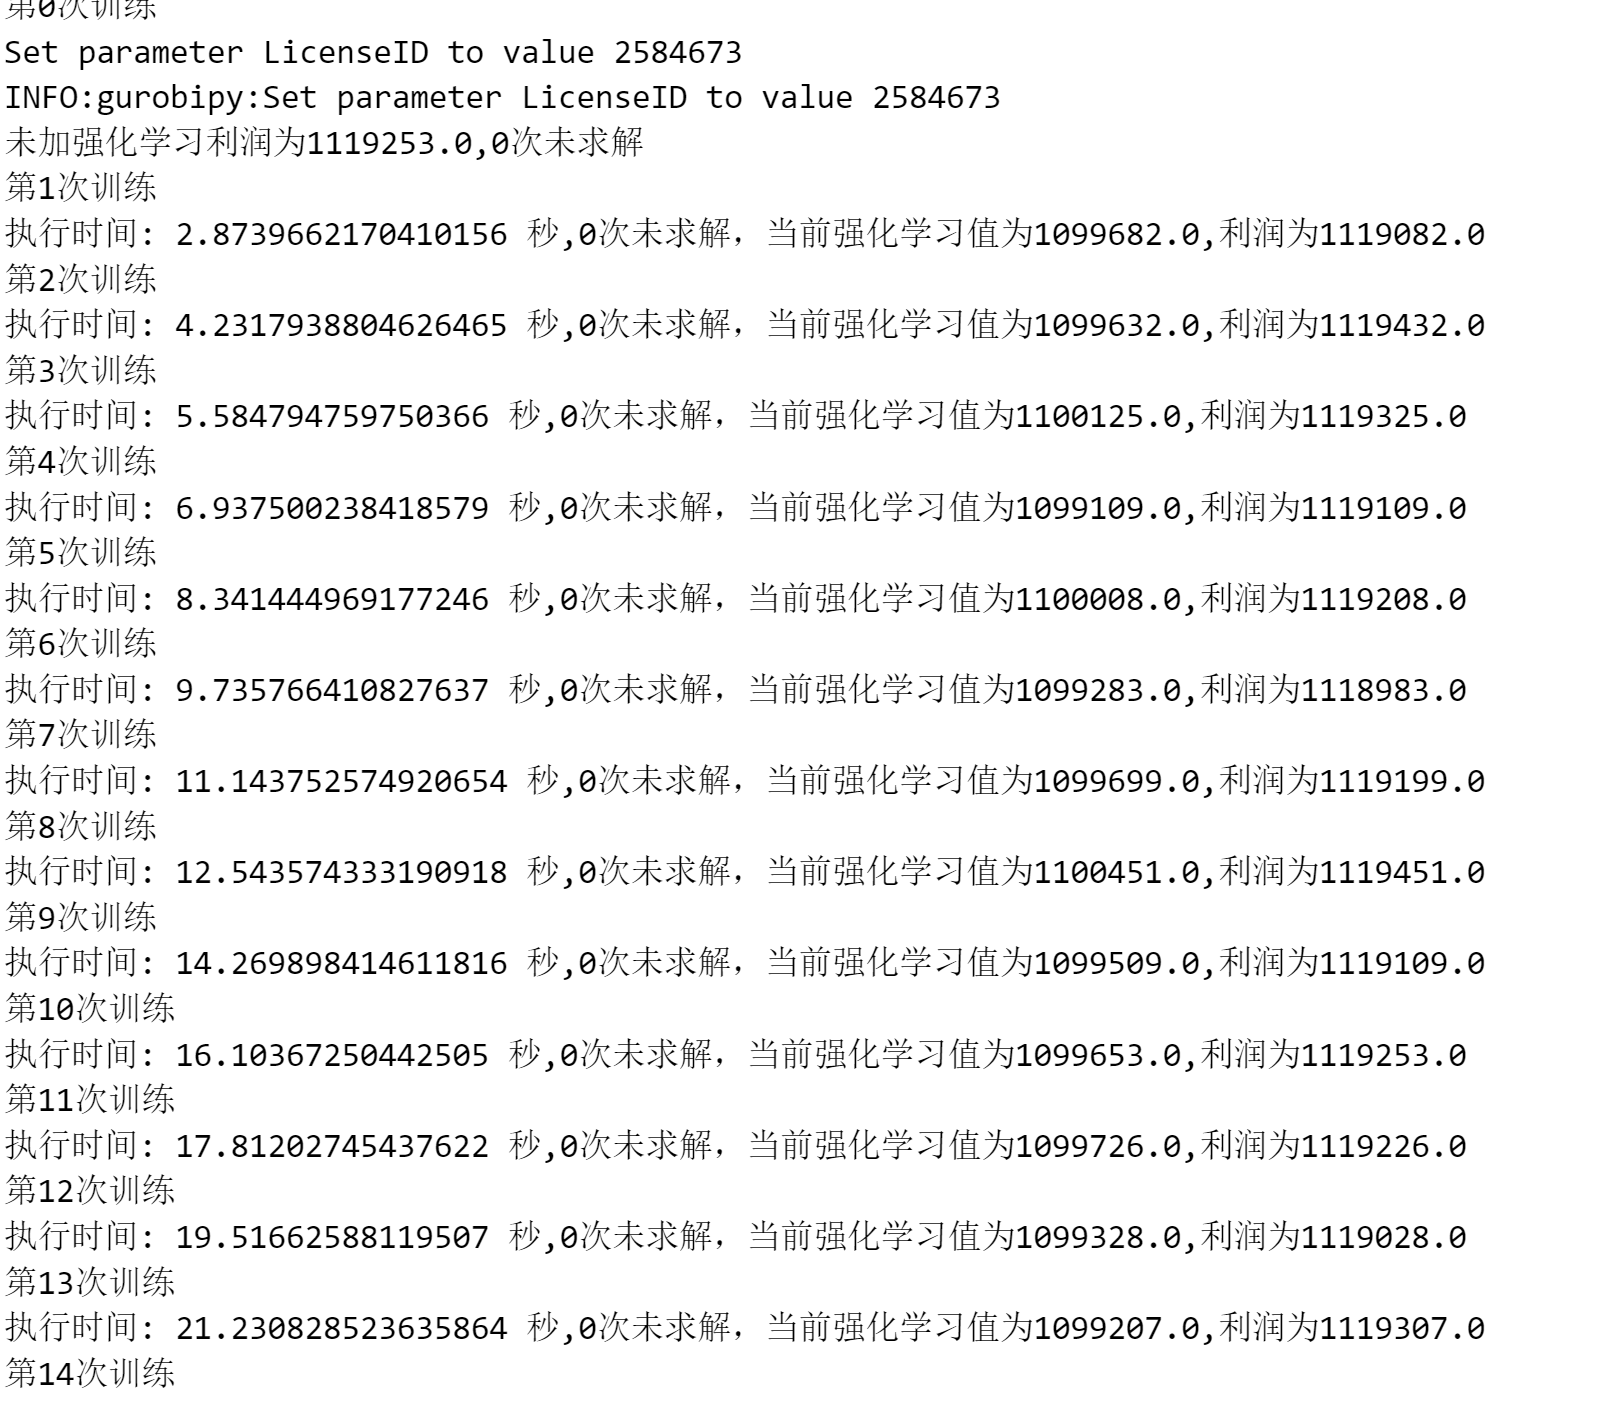

如果加了此代码有：

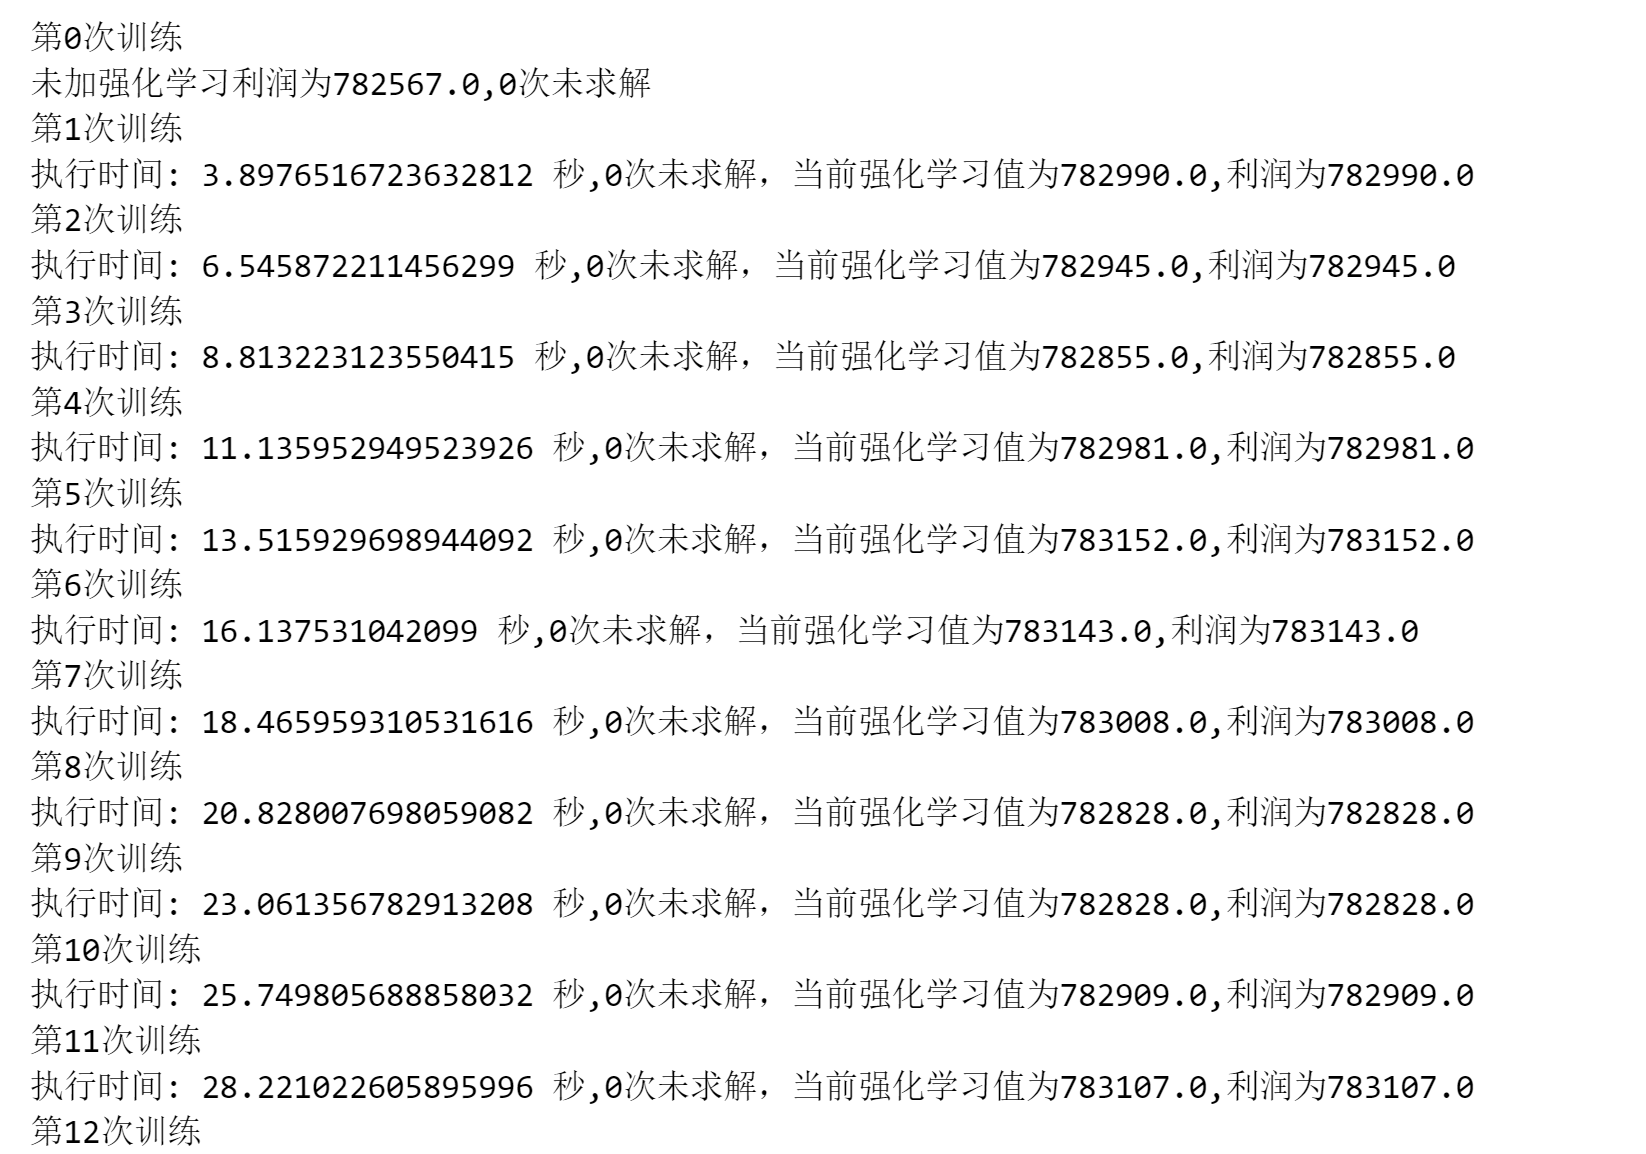

可见目前小规模问题上有多智能体总是要好的。尽管如此，那些好的经验未能在之后的训练中有所体现，并且最优性也无从得知

应用中大规模的代码则也有：
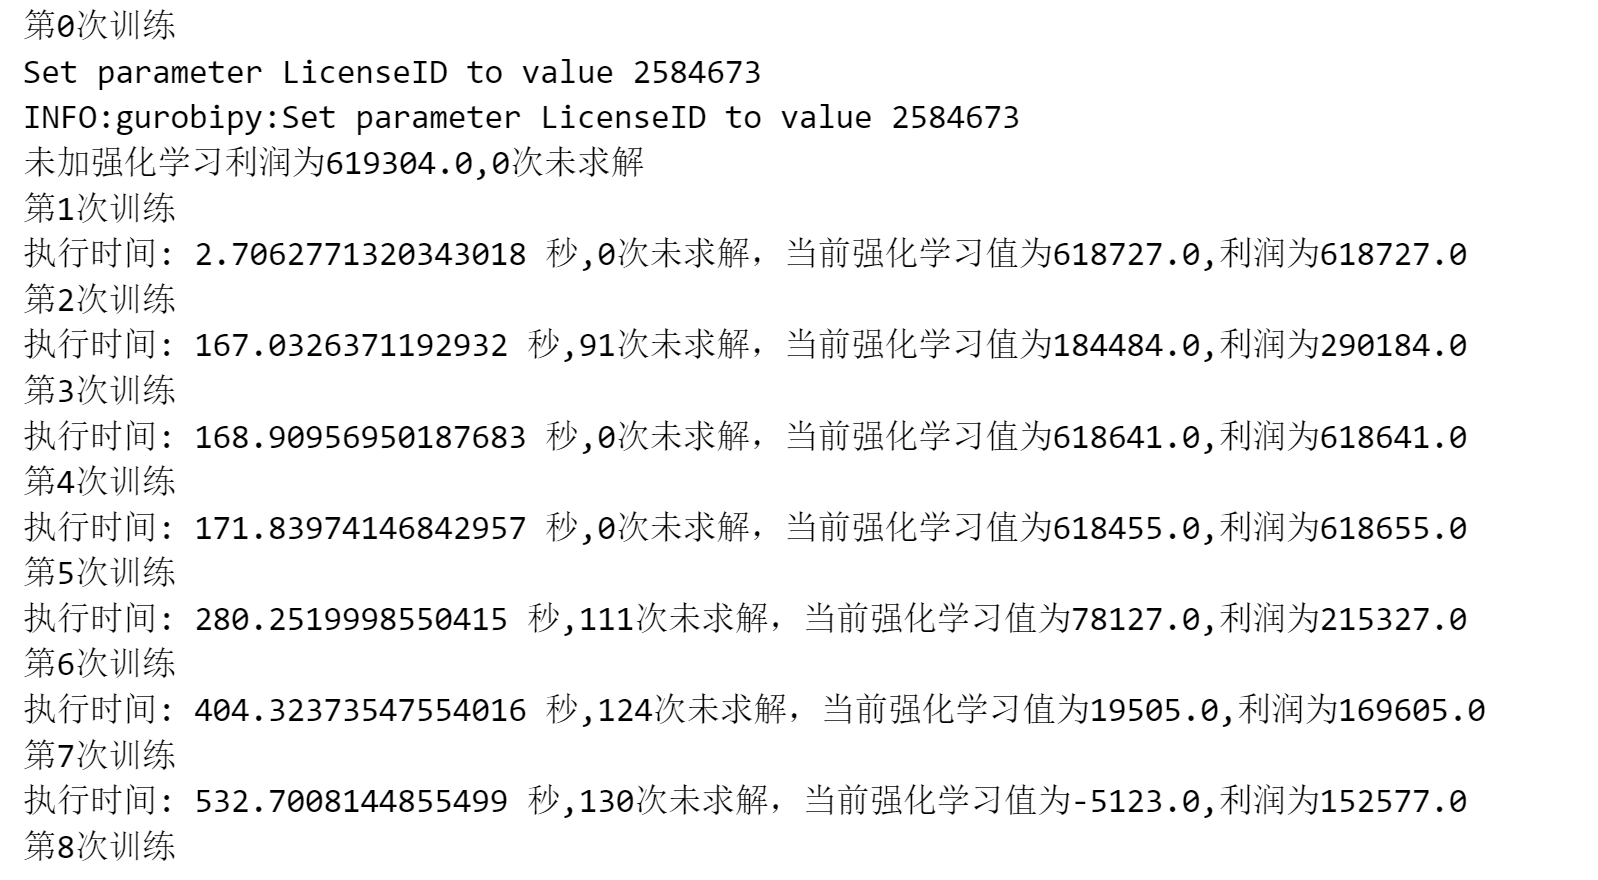

## 中大规模下性能不好

中大规模下上述保持代码，会导致一直没有训练结果产生（大概30多分钟），原因在于如果每个订单都被正确分配，那么初次神经网络得到正确的结果存在如下概率：
$$ p=\prod_{i=0}^{n}\frac{feasible_i}{num\_city} $$
同时，没有一个函数告知智能体哪些改进是不正确的。所以为了能有结果采用此代码
```
    COUNT = 999
    min_reward = -999999
    min_action = action
    while reward != 0 and COUNT > 0:
        action = agent.take_action(vehicle_states, order_states)
        reward = env.test_step(orders_unmatched,action)
        COUNT -= 1
        if reward > min_reward:
            min_reward = reward
            min_action = action
    if COUNT == 0:
        reward = env.test_step(orders_unmatched,min_action)
```

结果如图所示，不容乐观
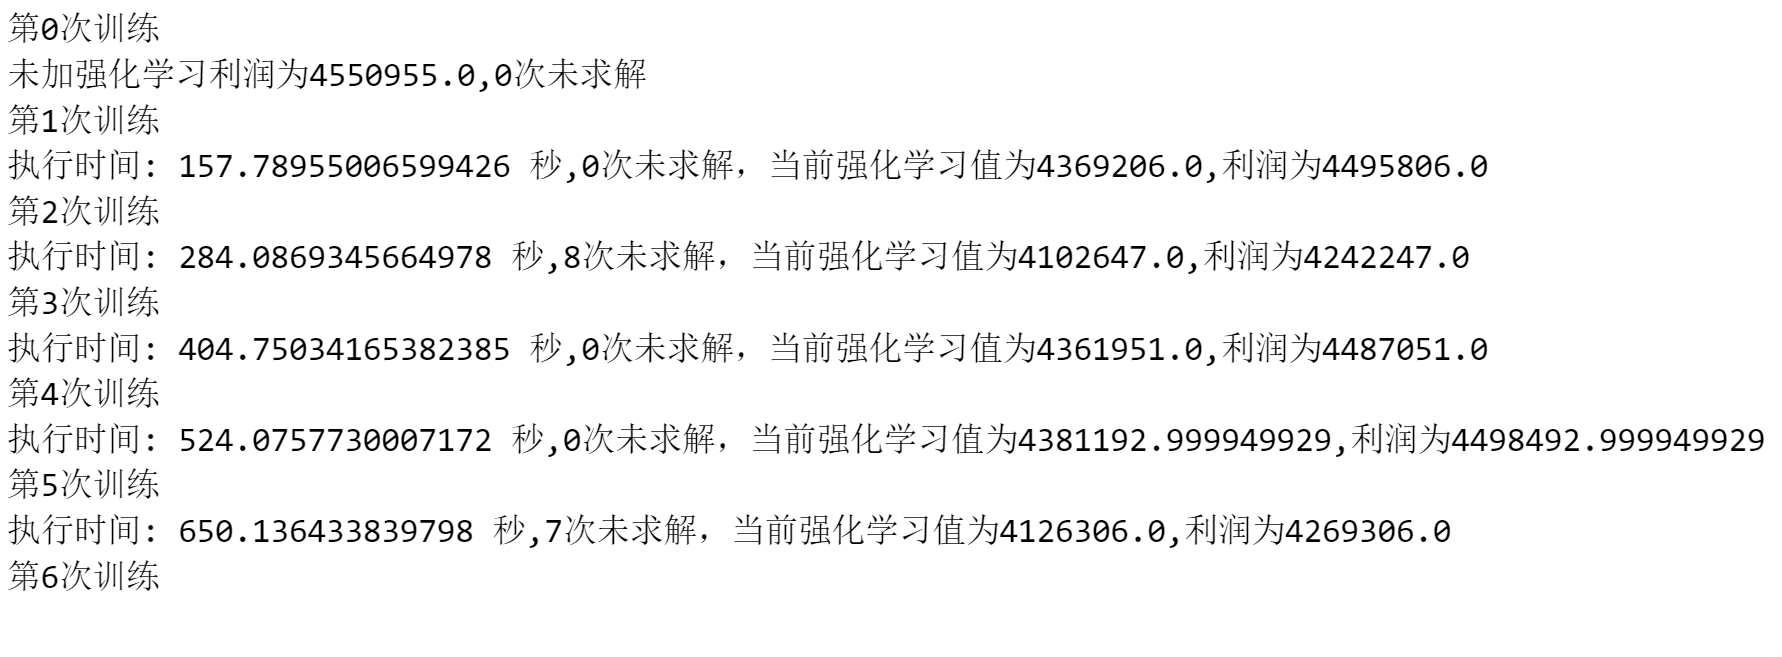

或者：


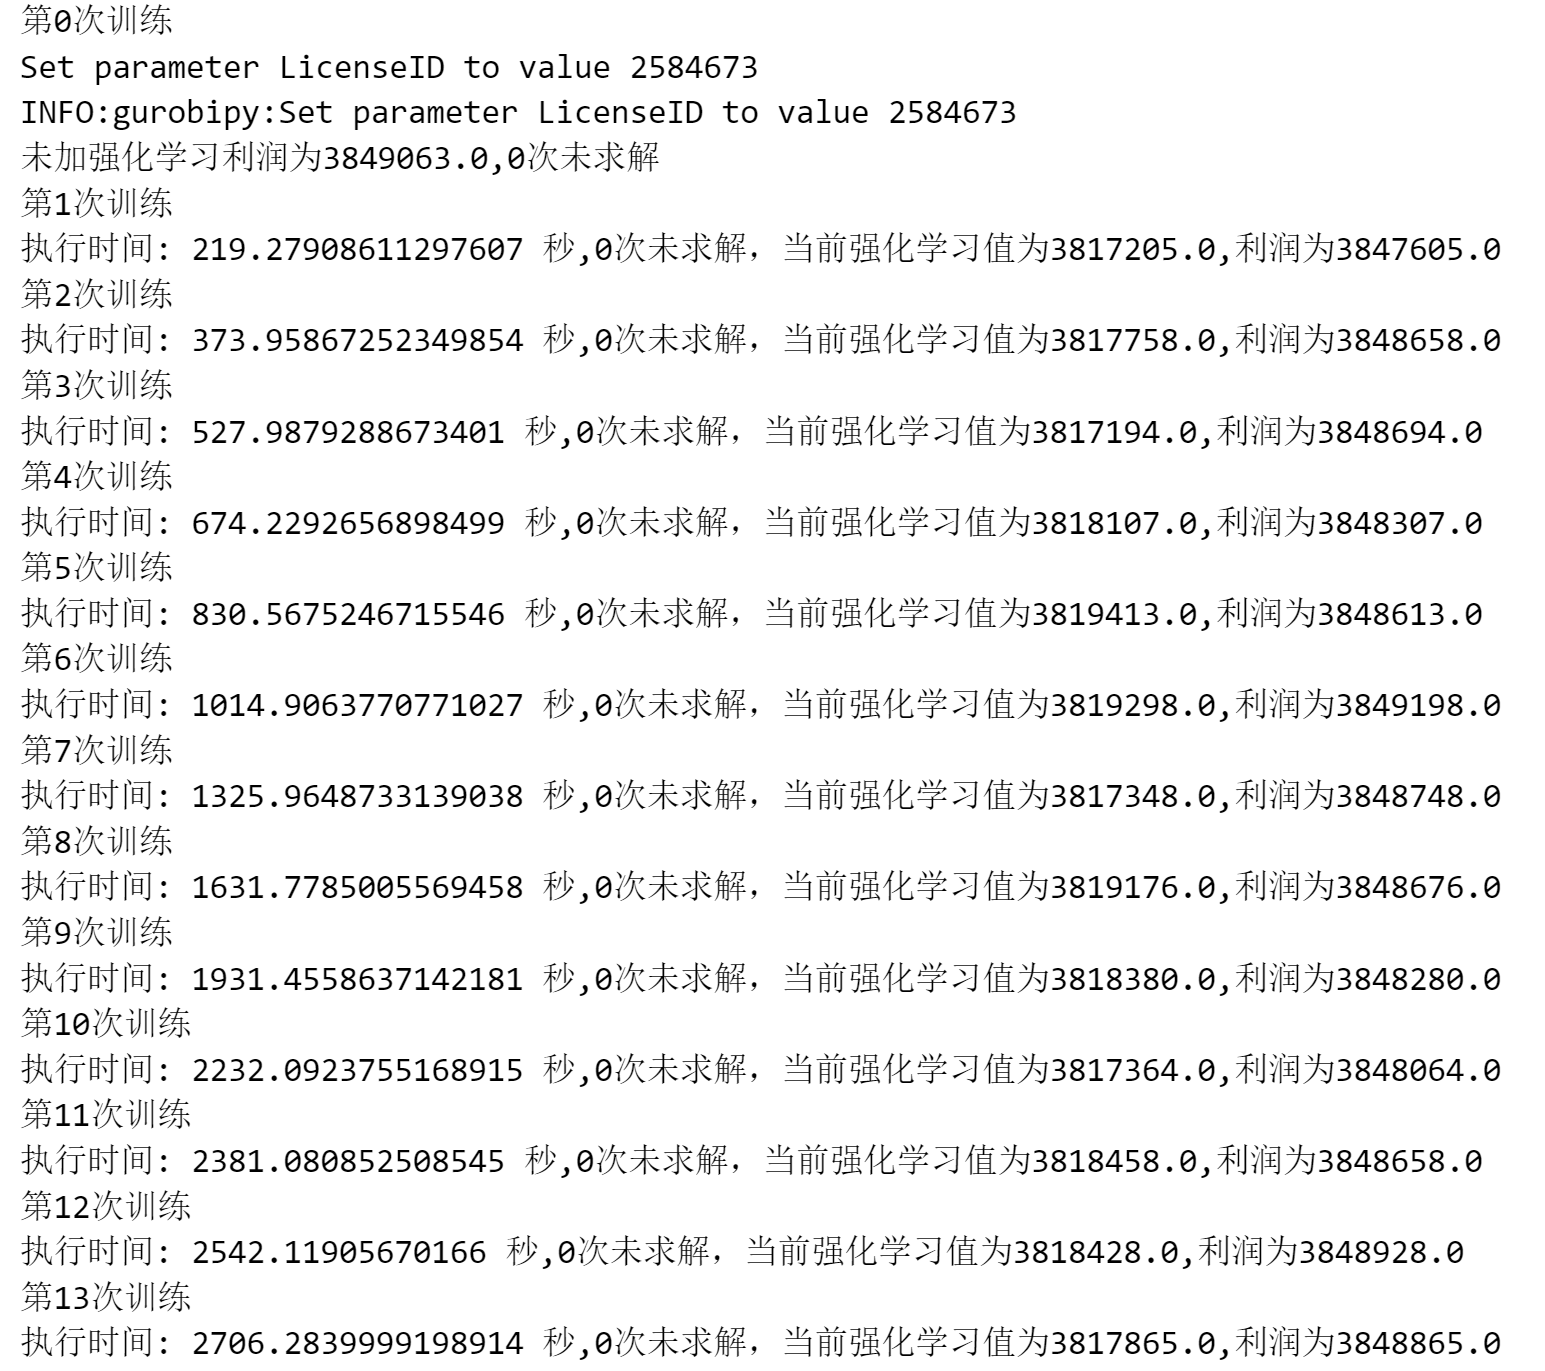

# 原问题未都匹配

这比求解器的效果要好，缺点是训练时间长

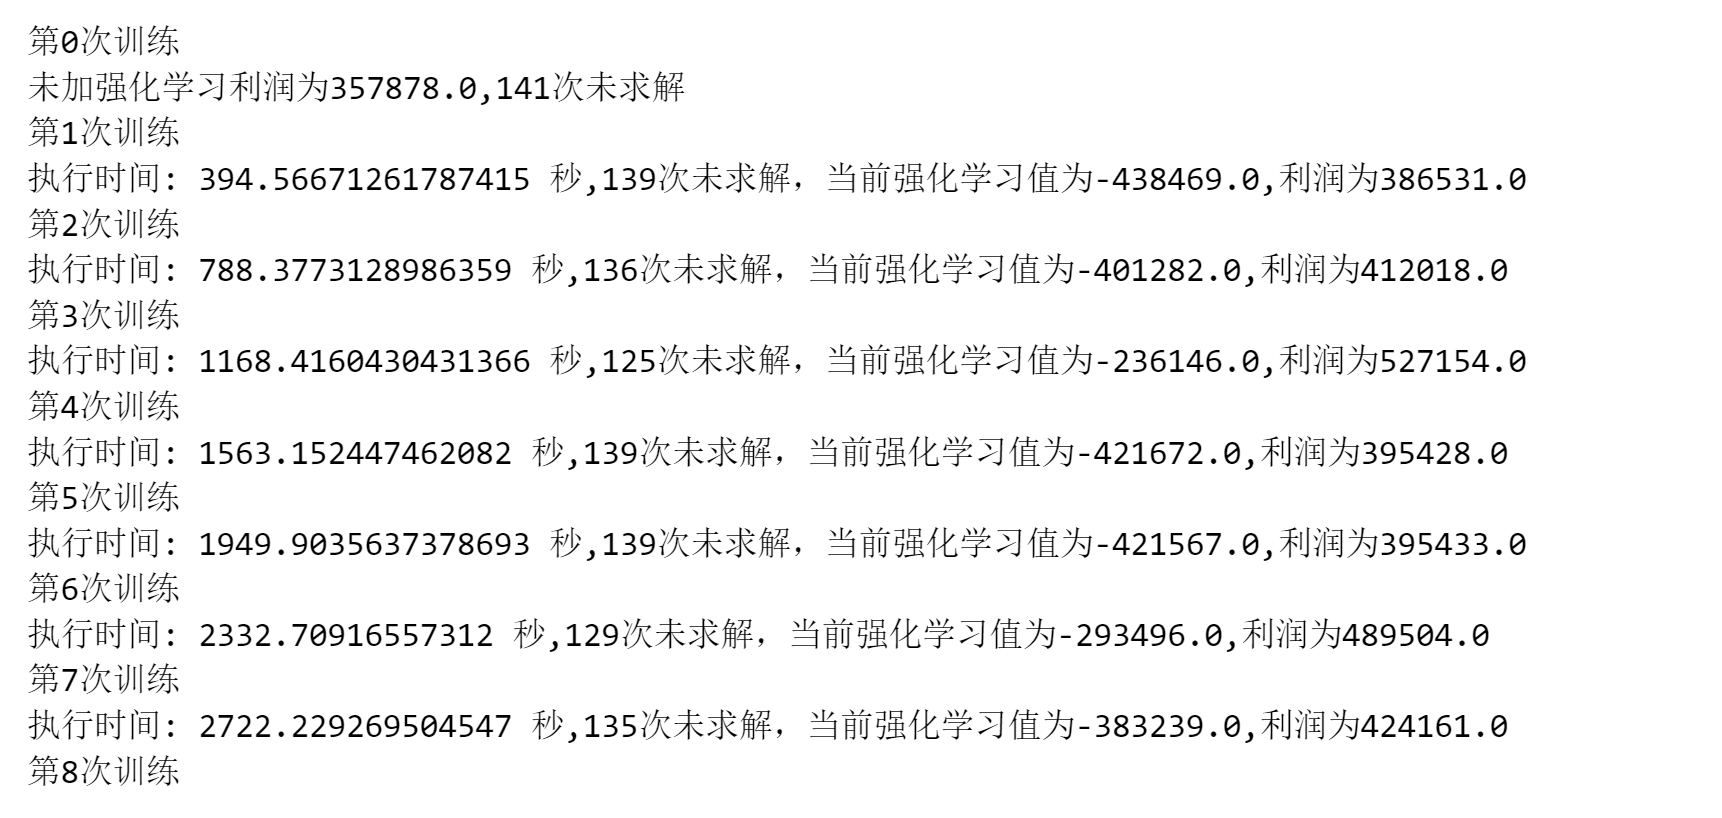

# 总结

1. 训练关联性不强，过去轮次中好的经验没有被充分利用
2. 训练学习性不足，仍然无法充分学习到一些关键点（reward = 0 下的正确分配）
3. 训练提升性不强，没有带来很大的改进